## Import

In [1]:
import torch

In [2]:
from src.utils.inference import Inference
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch

In [3]:
SRC_PATH = "data/public_test_data/new_public_test"
MODEL_PATH = "data/weights/model_swin_transformer_v2_200.pt"

## Predict

In [4]:
infer = Inference(MODEL_PATH  = MODEL_PATH)

{'transformer': {'embed_size': 384, 'num_heads': 8, 'num_layers': 4, 'max_len': 320, 'dropout': 0.1, 'bias': False, 'embed_type': 'position'}, 'encoder': {'type': 'swin_transformer_v2', 'swin': {'patch_size': [4, 4], 'embed_dim': 48, 'window_size': [2, 8], 'dropout': 0.1, 'depths': [2, 2, 6, 2], 'num_heads': [3, 6, 12, 24]}}, 'decoder': {'type': 'transformer'}, 'scheduler': {'active': True, 'first_cycle_steps': 400, 'cycle_mult': 1, 'max_lr': 0.0005, 'min_lr': 3e-05, 'warmup_steps': 40, 'gamma': 0.98}, 'dataloader': {'num_workers': 0, 'type': 'normal'}, 'img_size': (64, 256), 'device': device(type='cuda', index=0), 'lr': 0.0001, 'padding': True, 'enhancing': True, 'label_smoothing': 0.1, 'max_grad_norm': 0.5, 'batch_size': 256, 'num_epochs': 200, 'save_per_epochs': 1, 'print_type': 'per_epoch'}


| Evaluating: [###################]  100.00% | ETA:     0.0s | Done!
{'public_test_img_10861.jpg': 'Bê-Kê'}


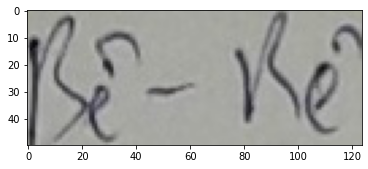

In [17]:
idx = torch.randint(1000,())
img = Image.open(os.path.join(SRC_PATH,os.listdir(SRC_PATH)[idx]))
infer.model.eval()
print(infer.predict(SRC_PATH,[os.listdir(SRC_PATH)[idx]]))
plt.imshow(img)

In [6]:
from datetime import datetime
date = datetime.now().strftime('%Y-%m-%d-%Hh-%Mp-%Ss')

In [7]:
date

'2023-09-11-12h-26p-19s'

In [8]:
pred = infer.predict(SRC_PATH,os.listdir(SRC_PATH),batch_size=200,save=True,save_dir=f'data/predict/{date}')

| Evaluating: [-------------------]    4.24% | ETA:   212.7s | 

KeyboardInterrupt: 

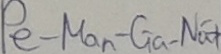

In [ ]:
Image.open(os.path.join(SRC_PATH,"public_test_img_13054.jpg"))

In [ ]:
import PIL

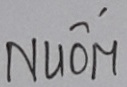

In [ ]:
img

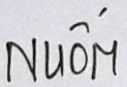

In [ ]:
PIL.ImageOps.autocontrast(img)

In [ ]:
from PIL.ImageOps import autocontrast

In [ ]:
autocontrast

<function PIL.ImageOps.autocontrast(image, cutoff=0, ignore=None, mask=None, preserve_tone=False)>